In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\siddh\AppData\Local\Temp\ipykernel_5820\901465343.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
cust_acq = pd.read_csv("Customer Acqusition.csv")
repayment = pd.read_csv("Repayment.csv")
spend = pd.read_csv("Spend.csv")

In [3]:
cust_acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [5]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [6]:
print(cust_acq.shape)
print(repayment.shape)
print(spend.shape)

(100, 8)
(1523, 5)
(1500, 5)


In [7]:
cust_acq.drop("No", axis=1, inplace=True)

In [8]:
repayment.drop(["SL No:", "Unnamed: 4"], axis=1, inplace=True)

In [9]:
spend.drop("Sl No:", axis=1, inplace=True)

In [10]:
print(cust_acq.shape)
print(repayment.shape)
print(spend.shape)

(100, 7)
(1523, 3)
(1500, 4)


In [11]:
cust_acq.dtypes

Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [12]:
repayment.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [13]:
spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [14]:
cust_acq.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [15]:
repayment.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [16]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [17]:
repayment.dropna(inplace=True)

In [18]:
repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

1. In the above dataset,

a. In case age is less than 18, replace it with mean of age values.

In [19]:
mean_age = cust_acq["Age"].mean()
mean_age

46.49

In [20]:
cust_acq.loc[cust_acq["Age"] < 18, "Age"] = cust_acq["Age"].mean()

C:\Users\siddh\AppData\Local\Temp\ipykernel_5820\3118726848.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '46.49' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cust_acq.loc[cust_acq["Age"] < 18, "Age"] = cust_acq["Age"].mean()


In [21]:
mean_age = cust_acq["Age"].mean()
mean_age

48.39940000000001

In [22]:
cust_acq.loc[cust_acq["Age"] < 18, "Age"]

Series([], Name: Age, dtype: float64)

b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [23]:
cust_acq.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [24]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [25]:
cust_spend = pd.merge(left=cust_acq, right=spend, on="Customer", how="inner")
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [26]:
cust_spend.shape

(1500, 10)

In [27]:
cust_spend[cust_spend["Amount"] > cust_spend["Limit"]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [28]:
cust_spend.loc[cust_spend["Amount"] > cust_spend["Limit"], "Amount"] = (50 * cust_spend["Limit"]).div(100)

In [29]:
cust_spend[cust_spend["Amount"] > cust_spend["Limit"]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


c. Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [30]:
cust_acq.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [31]:
repayment.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [32]:
cust_repay = pd.merge(left=repayment, right=cust_acq, on="Customer", how="inner")
cust_repay.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [33]:
cust_repay[cust_repay["Amount"] > cust_repay["Limit"]]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
7,A8,5-Feb-04,156913.59,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,A9,28-Feb-05,417294.81,79.00,CHENNAI,Silver,100003.0,C9,Govt
17,A18,5-Mar-06,213352.06,34.00,BANGALORE,Silver,100000.0,C18,Salaried_MNC
18,A19,4-Apr-05,347826.27,27.00,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt
19,A20,30-Apr-06,471099.22,27.00,CALCUTTA,Platimum,10001.0,C20,Govt
...,...,...,...,...,...,...,...,...,...
1483,A57,19-Mar-04,207786.09,37.00,TRIVANDRUM,Silver,100001.0,C19,Normal Salary
1496,A68,10-May-06,319836.49,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,A69,11-Jul-06,247628.45,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,A70,12-Aug-05,454016.51,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [34]:
cust_repay.loc[cust_repay["Amount"] > cust_repay["Limit"], "Amount"] = cust_repay["Limit"]

In [35]:
cust_repay[cust_repay["Amount"] > cust_repay["Limit"]]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment


2. From the above dataset create the following summaries:

a. How many distinct customers exist?

In [36]:
dist_cust = cust_acq["Customer"].nunique()
dist_cust

100

b. How many distinct categories exist?

In [37]:
cust_acq["Segment"].value_counts()

Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64

C:\Users\siddh\AppData\Local\Temp\ipykernel_5820\545745900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cust_acq, x="Segment", palette=["cyan", "lightgreen", "skyblue", "orange", "purple"])


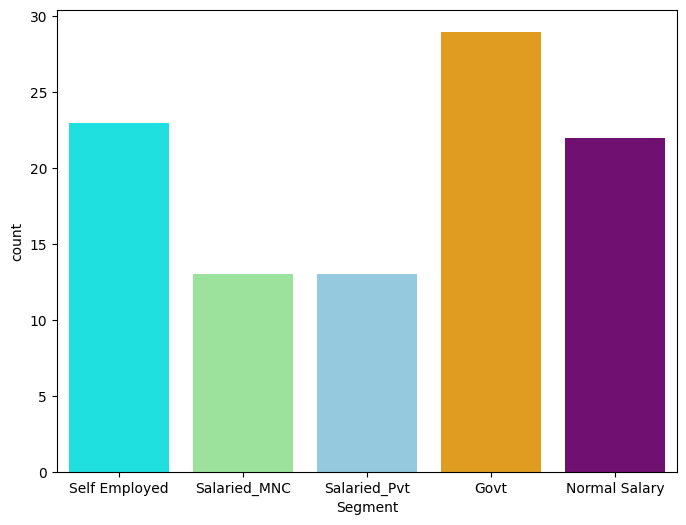

In [91]:
plt.figure(figsize=(8,6))
sns.countplot(data=cust_acq, x="Segment", palette=["cyan", "lightgreen", "skyblue", "orange", "purple"])
plt.show()

In [39]:
len(cust_acq["Segment"].value_counts())

5

c. What is the average monthly spend by customers?

In [40]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [41]:
spend["Month"] = pd.to_datetime(spend["Month"])
spend.head()

C:\Users\siddh\AppData\Local\Temp\ipykernel_5820\403258731.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend["Month"] = pd.to_datetime(spend["Month"])


,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [42]:
spend["Monthly"] = spend["Month"].apply(lambda x: pd.Timestamp.strftime(x, format="%B"))
spend["Yearly"] = spend["Month"].apply(lambda x: pd.Timestamp.strftime(x, format="%Y"))

In [43]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [44]:
avg_monthly_spend= round(spend.groupby(['Yearly','Monthly'])["Amount"].mean(), 2)
avg_monthly_spend

Yearly  Monthly  
2004    April        235272.04
        February     221215.27
        January      251712.07
        March        232146.12
        May          217539.24
        November     270486.40
        September    310923.38
2005    April        252181.33
        August       233734.63
        December     147503.06
        February     229802.28
        January      292741.37
        July         229116.66
        June         262688.11
        May          245696.52
        November     286143.32
        October      194568.64
        September    188666.20
2006    April        232468.97
        August       240699.72
        December     270470.98
        February     253858.26
        January      282058.01
        July         287505.10
        June         177252.39
        March        247166.08
        May          236162.74
        November     182841.29
        October      236136.34
        September    158520.09
Name: Amount, dtype: float64

d. What is the average monthly repayment by customers?

In [45]:
repayment.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [46]:
repayment["Month"] = pd.to_datetime(repayment["Month"])
repayment.head()

C:\Users\siddh\AppData\Local\Temp\ipykernel_5820\3052208959.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  repayment["Month"] = pd.to_datetime(repayment["Month"])


,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [47]:
repayment["Monthly"] = repayment["Month"].apply(lambda x: pd.Timestamp.strftime(x, format="%B"))
repayment["Yearly"] = repayment["Month"].apply(lambda x: pd.Timestamp.strftime(x, format="%Y"))

In [48]:
avg_monthly_repay = round(repayment.groupby(["Yearly","Monthly"])["Amount"].mean(), 2)
avg_monthly_repay

Yearly  Monthly  
2004    April        259141.68
        February     256702.63
        January      243489.65
        March        252585.28
        May          226162.72
        November     209592.24
        September    184487.85
2005    April        212688.63
        August       264430.92
        December     320379.34
        February     238829.27
        January      240548.10
        July         239871.48
        June         210199.82
        May          263207.37
        November     256695.12
        October      219849.96
        September    247700.17
2006    April        275472.25
        August       224143.99
        December     252736.57
        February     284489.57
        January      293475.39
        July         257936.38
        June         251990.45
        March        240851.27
        May          256920.88
        November     199399.20
        October      260765.48
        September    262533.88
Name: Amount, dtype: float64

e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [49]:
cust_spend_repay = pd.merge(left=cust_spend, right=repayment, on="Customer", how="inner")
cust_spend_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,January,2005


In [50]:
cust_spend_repay.rename(columns={"Amount_x": "Spend_Amount", "Amount_y":"Repay_Amount"}, inplace=True)
cust_spend_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Spend_Amount,Month_y,Repay_Amount,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,January,2005


In [51]:
interest = cust_spend_repay.groupby(["Yearly", "Monthly"])[["Spend_Amount", "Repay_Amount"]].sum()
interest

Spend_Amount  Repay_Amount
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

In [52]:
interest["Monthly Profit"] = interest["Repay_Amount"] - interest["Spend_Amount"]
interest

Spend_Amount  Repay_Amount  Monthly Profit
Yearly Monthly                                              
2004   April      1.194516e+08  2.285403e+08    1.090887e+08
       February   7.613922e+07  1.602419e+08    8.410268e+07
       January    1.088357e+09  1.699210e+09    6.108525e+08
       March      5.594171e+07  8.974470e+07    3.380298e+07
       May        8.800456e+07  1.411594e+08    5.315485e+07
       November   5.504612e+07  7.860290e+07    2.355678e+07
       September  5.144278e+07  8.016122e+07    2.871844e+07
2005   April      9.366405e+07  1.747894e+08    8.112539e+07
       August     1.361400e+08  2.477449e+08    1.116049e+08
       December   4.348638e+07  9.944533e+07    5.595895e+07
       February   5.890557e+08  9.416163e+08    3.525606e+08
       January    1.324129e+08  1.810333e+08    4.862042e+07
       July       3.995653e+07  7.997268e+07    4.001615e+07
       June       1.174019e+08  2.213774e+08    1.039755e+08
       May        7.149030e+08  1.099197e+09    3.842944e+08
       November   1.532278e+08  2.763119e+08    1.230841e+08
       October    3.140993e+07  6.027830e+07    2.886837e+07
       September  3.195551e+07  7.530449e+07    4.334898e+07
2006   April      3.229722e+08  6.093666e+08    2.863944e+08
       August     5.849630e+07  7.167032e+07    1.317402e+07
       December   4.585222e+07  7.087702e+07    2.502480e+07
       February   1.654843e+08  2.903280e+08    1.248436e+08
       January    5.127574e+07  8.974491e+07    3.846917e+07
       July       1.444093e+08  2.245720e+08    8.016271e+07
       June       5.302118e+07  6.914431e+07    1.612313e+07
       March      7.393854e+08  1.115725e+09    3.763400e+08
       May        3.297954e+08  5.434823e+08    2.136869e+08
       November   1.124836e+08  1.355832e+08    2.309955e+07
       October    5.285823e+07  7.890924e+07    2.605102e+07
       September  5.395681e+07  8.083199e+07    2.687518e+07

In [53]:
interest["Interest Earned"] = interest["Spend_Amount"] = (2.9 * interest["Monthly Profit"])/100
interest

Spend_Amount  Repay_Amount  Monthly Profit  Interest Earned
Yearly Monthly                                                               
2004   April      3.163572e+06  2.285403e+08    1.090887e+08     3.163572e+06
       February   2.438978e+06  1.602419e+08    8.410268e+07     2.438978e+06
       January    1.771472e+07  1.699210e+09    6.108525e+08     1.771472e+07
       March      9.802865e+05  8.974470e+07    3.380298e+07     9.802865e+05
       May        1.541491e+06  1.411594e+08    5.315485e+07     1.541491e+06
       November   6.831466e+05  7.860290e+07    2.355678e+07     6.831466e+05
       September  8.328349e+05  8.016122e+07    2.871844e+07     8.328349e+05
2005   April      2.352636e+06  1.747894e+08    8.112539e+07     2.352636e+06
       August     3.236542e+06  2.477449e+08    1.116049e+08     3.236542e+06
       December   1.622810e+06  9.944533e+07    5.595895e+07     1.622810e+06
       February   1.022426e+07  9.416163e+08    3.525606e+08     1.022426e+07
       January    1.409992e+06  1.810333e+08    4.862042e+07     1.409992e+06
       July       1.160468e+06  7.997268e+07    4.001615e+07     1.160468e+06
       June       3.015290e+06  2.213774e+08    1.039755e+08     3.015290e+06
       May        1.114454e+07  1.099197e+09    3.842944e+08     1.114454e+07
       November   3.569438e+06  2.763119e+08    1.230841e+08     3.569438e+06
       October    8.371827e+05  6.027830e+07    2.886837e+07     8.371827e+05
       September  1.257121e+06  7.530449e+07    4.334898e+07     1.257121e+06
2006   April      8.305437e+06  6.093666e+08    2.863944e+08     8.305437e+06
       August     3.820465e+05  7.167032e+07    1.317402e+07     3.820465e+05
       December   7.257193e+05  7.087702e+07    2.502480e+07     7.257193e+05
       February   3.620465e+06  2.903280e+08    1.248436e+08     3.620465e+06
       January    1.115606e+06  8.974491e+07    3.846917e+07     1.115606e+06
       July       2.324719e+06  2.245720e+08    8.016271e+07     2.324719e+06
       June       4.675707e+05  6.914431e+07    1.612313e+07     4.675707e+05
       March      1.091386e+07  1.115725e+09    3.763400e+08     1.091386e+07
       May        6.196920e+06  5.434823e+08    2.136869e+08     6.196920e+06
       November   6.698869e+05  1.355832e+08    2.309955e+07     6.698869e+05
       October    7.554795e+05  7.890924e+07    2.605102e+07     7.554795e+05
       September  7.793803e+05  8.083199e+07    2.687518e+07     7.793803e+05

f. What are the top 5 product types?

In [54]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [55]:
spend["Type"].value_counts().head()

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

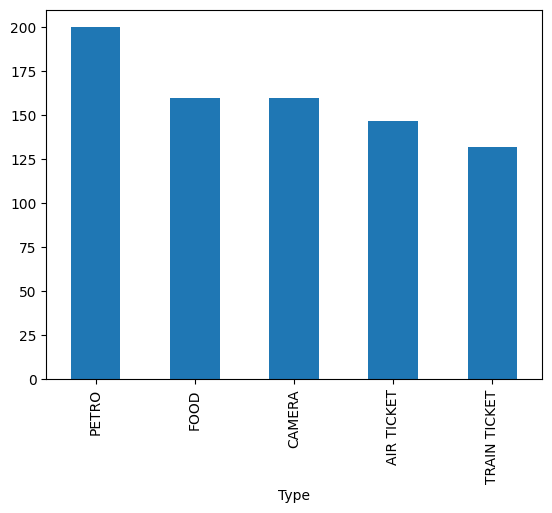

In [93]:
spend["Type"].value_counts().head(5).plot(kind="bar")
plt.show()

g. Which city is having maximum spend?

In [57]:
cust_acq.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [58]:
city_max = cust_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)
city_max

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

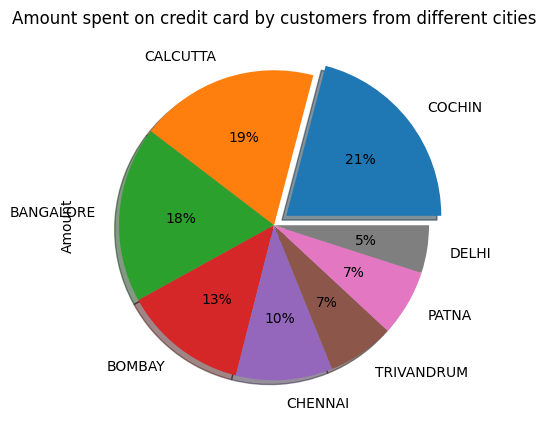

In [107]:
plt.figure(figsize=(5,10))
city_max.plot(kind="pie", autopct="%1.0f%%", shadow=True, labeldistance=1.15, explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

In [60]:
print("We can see that city Cochin is having maximum spend.")

We can see that city Cochin is having maximum spend.


h. Which age group is spending more money?

In [61]:
cust_spend["Age Group"] = pd.cut(cust_spend["Age"], bins=np.arange(18, 88, 8), labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"], include_lowest=True)
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82


In [62]:
age_spend = cust_spend.groupby("Age Group")["Amount"].sum().sort_values(ascending=False)
age_spend

C:\Users\siddh\AppData\Local\Temp\ipykernel_5820\4231012314.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = cust_spend.groupby("Age Group")["Amount"].sum().sort_values(ascending=False)


Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

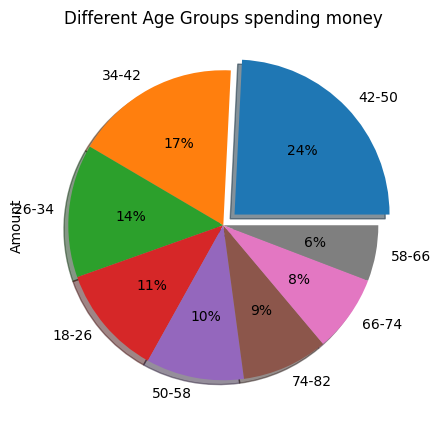

In [110]:
plt.figure(figsize=(5, 10))
age_spend.plot(kind = "pie",autopct="%1.0f%%", shadow=True, explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Different Age Groups spending money")
plt.show()

In [64]:
print("Age group from 42-50 is spending more money")

Age group from 42-50 is spending more money


i. Who are the top 10 customers in terms of repayment?

In [65]:
cust_repay.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [66]:
cust_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount", ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [67]:
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82


In [68]:
cust_spend["Month"] = pd.to_datetime(cust_spend["Month"])

C:\Users\siddh\AppData\Local\Temp\ipykernel_5820\2972196490.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cust_spend["Month"] = pd.to_datetime(cust_spend["Month"])


In [69]:
cust_spend['Year'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005


In [70]:
cust_spend_pivot = pd.pivot_table(data = cust_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")
cust_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

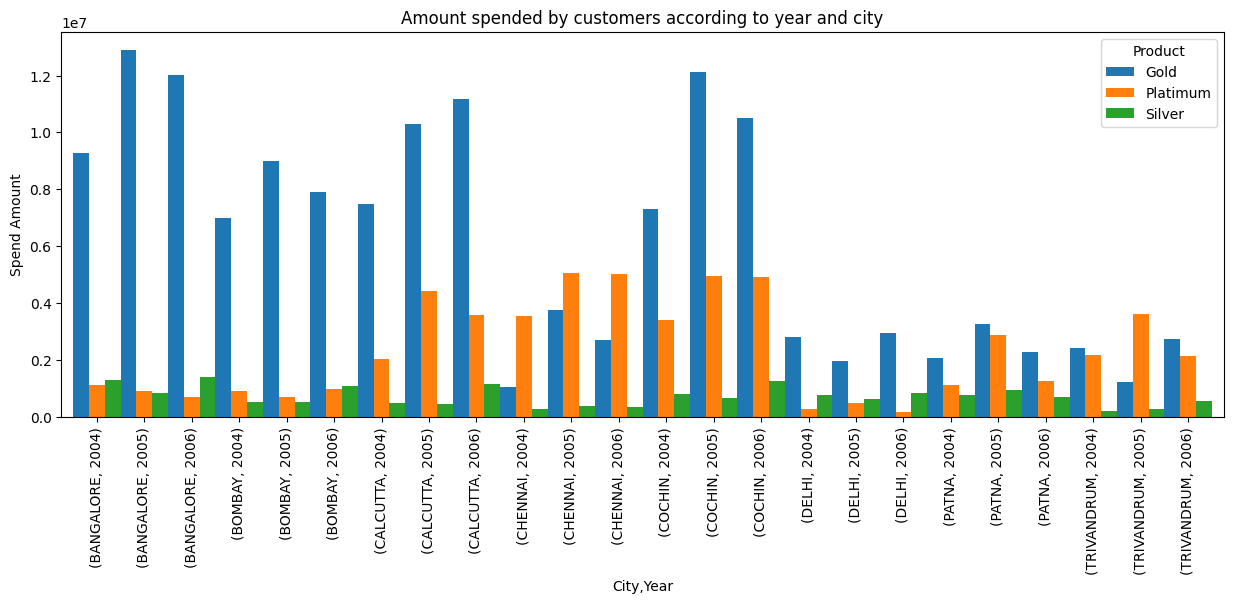

In [111]:
cust_spend_pivot.plot(kind="bar",figsize=(15,5),width=1.0)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

4. Create graphs for

a. Monthly comparison of total spends, city wise

In [72]:
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005


In [73]:
cust_spend['Monthly'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [74]:
month_spend = cust_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

In [75]:
month_spend =pd.pivot_table(data=cust_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')
month_spend

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


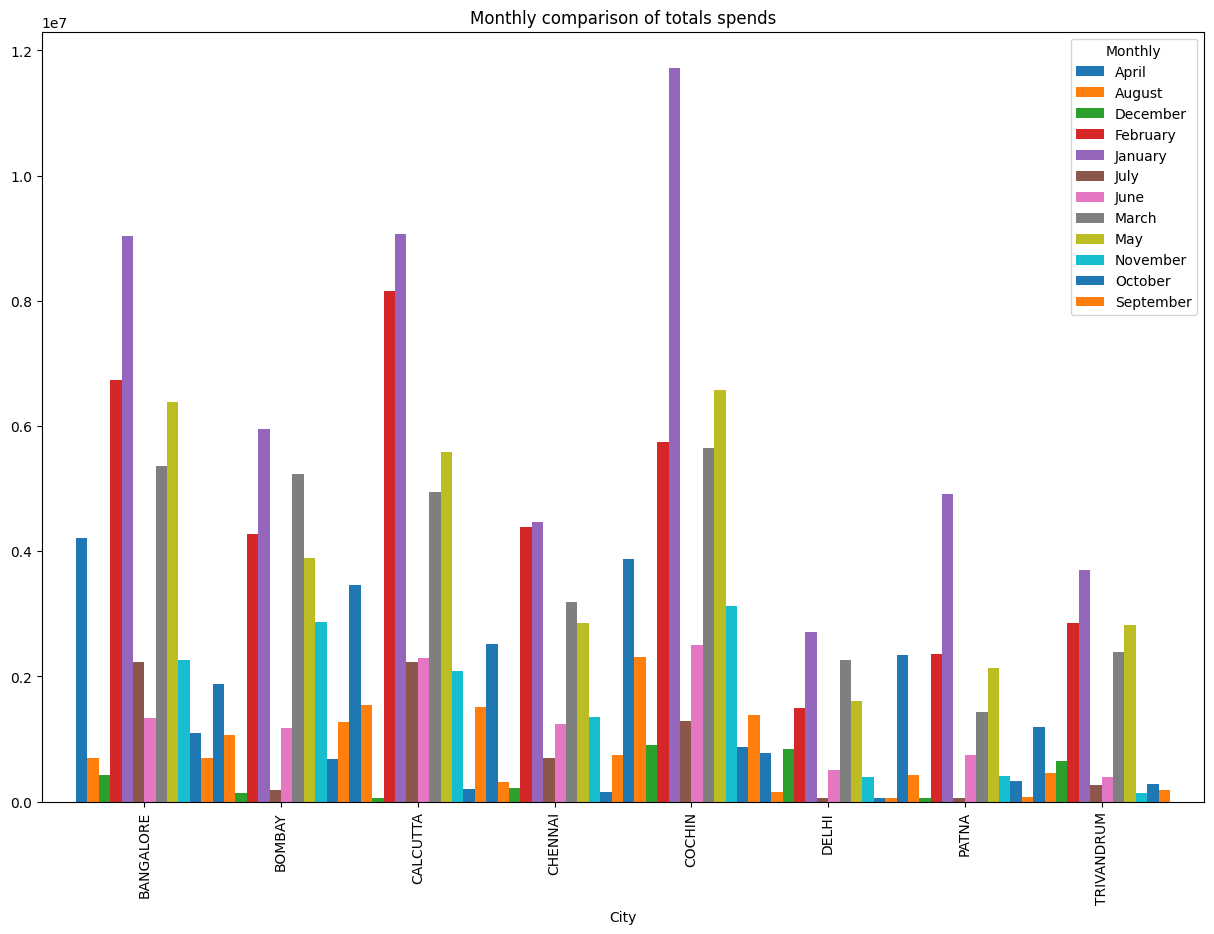

In [115]:
month_spend.plot(kind="bar", figsize=(15,10), width=1.0)
plt.title("Monthly comparison of totals spends")
plt.show()

b. Comparison of yearly spend on air tickets

In [77]:
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [78]:
air_tickets_spend = cust_spend.groupby(["Year", "Type"])[["Amount"]].sum().reset_index()

In [79]:
air_tick = air_tickets_spend.loc[air_tickets_spend["Type"]=="AIR TICKET"]
air_tick

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


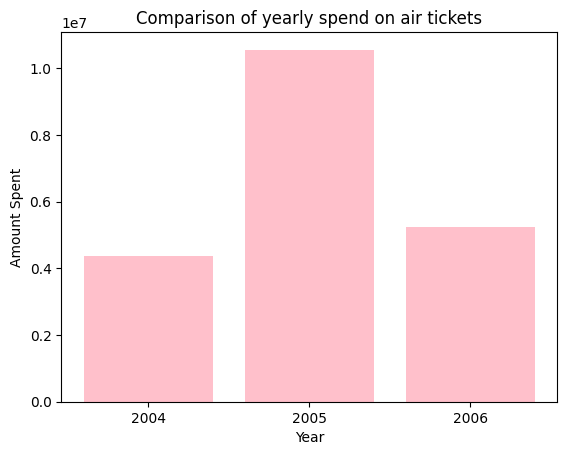

In [118]:
plt.bar(air_tick["Year"], height=air_tick["Amount"], color="pink")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [81]:
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [82]:
product_wise = pd.pivot_table(data=cust_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


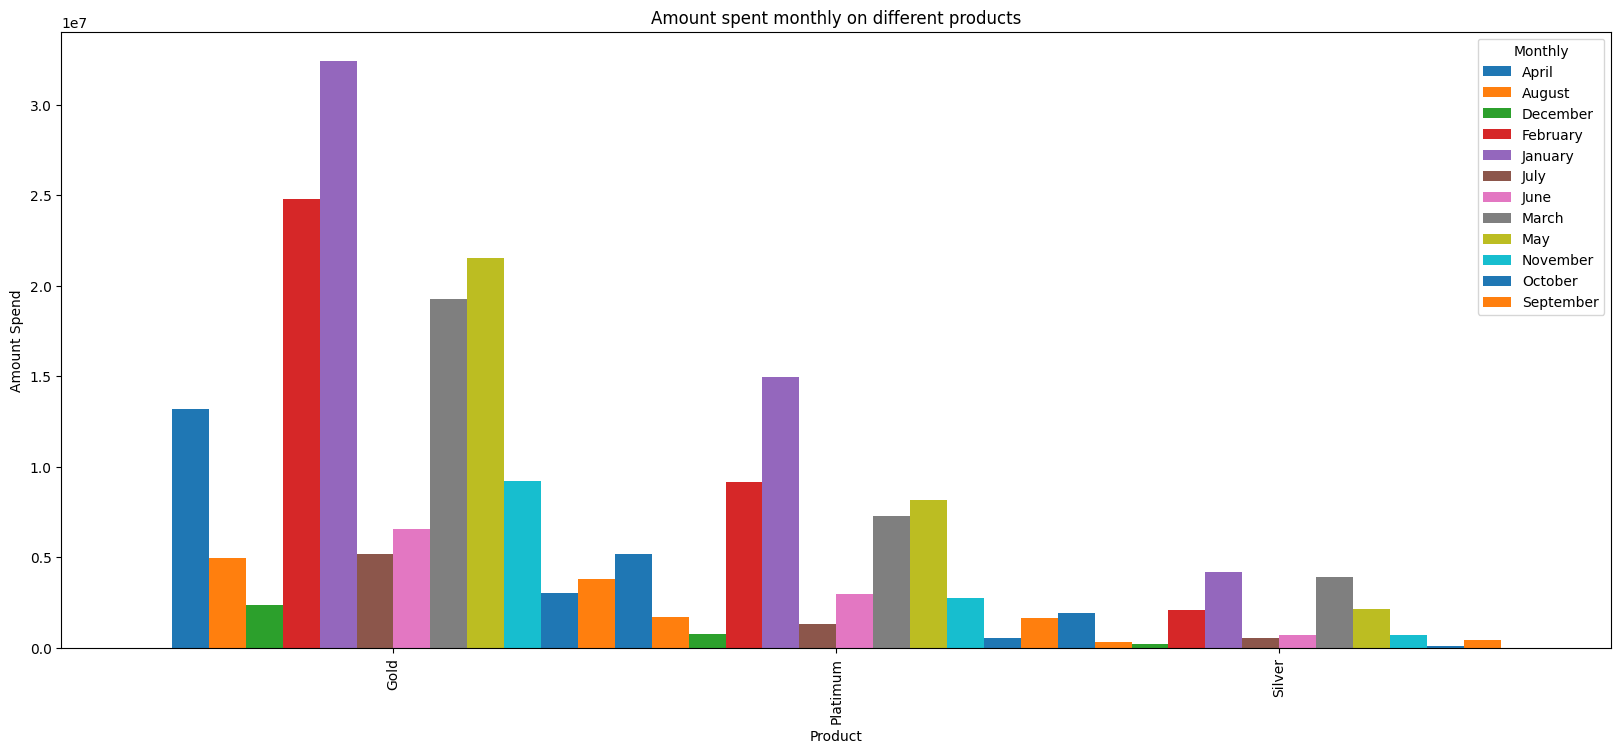

In [119]:
product_wise.plot(kind="bar", figsize=(20, 8), width=1.0)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

We can see that the sales are high for all the Products during the months:

January
February
March
April
May

From which, highest sales are in January

5. Write user defined PYTHON function to perform the following analysis:

You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers

In [84]:
cust_repay.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [85]:
cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_5820\214662920.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])


In [120]:
cust_repay['Monthly'] = cust_repay['Month'].apply(lambda x: pd.Timestamp.strftime(x, format="%B"))
cust_repay['Yearly'] = cust_repay['Month'].apply(lambda x: pd.Timestamp.strftime(x, format="%Y"))

In [87]:
def report(product,timeperiod):
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [88]:
report('silver','yearly')

Yearly                             2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18        491592.71   638296.41   700000.00
                   A23        664965.71  1000010.00   872925.32
                   A59        676557.50   427247.08   600018.00
                   A72        100000.00         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        COCHIN     A100        69551.19         NaN         NaN
                   A25        786338.08   611555.69  1000030.00
                   A7         500005.00   422177.27   608997.87
                   A74              NaN   100002.00         NaN
                   A79              NaN         NaN   193230.31
        CALCUTTA   A2         400000.00   410274.00   200000.00
                   A58        533815.62   540173.85   411640.17
                   A73              NaN   100001.00         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   100003.00
        BOMBAY     A22        953419.47  1141542.81   945271.83
                   A75              NaN   100003.00         NaN
                   A80              NaN         NaN   481205.64
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         380193.34   500015.00   697845.29
                   A96        100000.00         NaN         NaN
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00
        PATNA      A46        713614.32  1116730.89   839228.07
                   A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        DELHI      A24        397014.53  1184870.98   711068.52
                   A6         548574.15   427398.18   507280.51